In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [2]:
def post_process_results(b_list, filename='default.csv'):
    total_df = pd.DataFrame(b_list[0]).transpose()
    print('number of runs: {}'.format(len(b_list)))
    for r_dict in b_list[1:]:
        temp = pd.DataFrame(r_dict).transpose()
        total_df = total_df.add(temp)
        
    average_pd = total_df/10.0
    average_pd.to_csv(filename, sep=',')
    
    return average_pd

In [3]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation', 'relationship', 'race','sex','capital_gain','capital_loss',
                'hours_per_week','native_country','income']

adult_train_df = pd.read_csv('./uci_repos/adults/adult.data',names=column_names, na_values=['?'])
adult_test_df = pd.read_csv('./uci_repos/adults/adult.test', names=column_names,skiprows=[0], na_values=['?']) 

In [4]:
len(adult_train_df), len(adult_test_df)

(32561, 16281)

# Preprocessing

In [5]:
adult_test_df = adult_test_df.drop(['education','age'], axis=1)
adult_train_df = adult_train_df.drop(['education', 'age'], axis=1)

adult_test_df

,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,?,321403,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
scaler = StandardScaler()
scale_columns = ['fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
adult_test_df[scale_columns] = scaler.fit_transform(adult_test_df[scale_columns])
adult_train_df[scale_columns] = scaler.fit_transform(adult_train_df[scale_columns])

for feature in ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    le = LabelEncoder()
    adult_train_df[feature] = le.fit_transform(adult_train_df[feature])
    adult_test_df[feature] = le.fit_transform(adult_test_df[feature])

In [7]:
adult_train_df

,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,7,-1.063611,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,6,-1.008707,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,4,0.245079,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,4,0.425801,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,4,1.408176,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,0.639741,0.746039,2,13,5,4,0,-0.145920,-0.21666,-0.197409,39,0
32557,4,-0.335433,-0.420060,2,7,0,4,1,-0.145920,-0.21666,-0.035429,39,1
32558,4,-0.358777,-0.420060,6,1,4,4,0,-0.145920,-0.21666,-0.035429,39,0
32559,4,0.110960,-0.420060,4,1,3,4,1,-0.145920,-0.21666,-1.655225,39,0


In [8]:
adult_test_df

,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,4,0.353474,-1.196864,4,7,3,2,1,-0.142662,-0.218062,-0.031432,38,0
1,4,-0.942391,-0.417886,2,5,0,4,1,-0.142662,-0.218062,0.769918,38,0
2,2,1.395450,0.750582,2,11,0,4,1,-0.142662,-0.218062,-0.031432,38,1
3,4,-0.275397,-0.028397,2,7,0,2,1,0.871091,-0.218062,-0.031432,38,1
4,0,-0.812954,-0.028397,4,0,3,4,0,-0.142662,-0.218062,-0.832781,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,4,0.245794,1.140071,0,10,1,4,0,-0.142662,-0.218062,-0.351972,38,0
16277,0,1.248371,-0.417886,6,0,2,2,1,-0.142662,-0.218062,-0.031432,38,0
16278,4,1.755221,1.140071,2,10,0,4,1,-0.142662,-0.218062,0.769918,38,0
16279,4,-0.998420,1.140071,0,1,3,1,1,0.576644,-0.218062,-0.031432,38,0


In [9]:
X_train = adult_train_df.drop(columns=['income']).to_numpy()
y_train = (adult_train_df.income).to_numpy()
X_test= adult_test_df.drop(columns=['income']).to_numpy()
y_test = (adult_test_df.income).to_numpy()

In [10]:
'train data :', X_train.shape, 'test data :', X_test.shape

('train data :', (32561, 12), 'test data :', (16281, 12))

In [11]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [12]:
len(adult_test_df.native_country.unique())

41

In [13]:
def group_all_labels(data, num=100, minor=[]):
    # this function is to limit the number of labels that are used
    # it returns the indexes according the labels
    # data is an array of labels
    '''

    :param data: array of labels
    :param num: number required
    :param minor: list of minority indexes
    :return: array of labels indexes
    '''

    labels = np.unique(data)
    co_l = []
    min_col =[]
    if not minor:
        for l in labels:
            el_l = np.where(np.array(data) == l)
            co_l.append(el_l[0])

    else:
        for l in labels:
            if l in minor:
                el_l = np.where(np.array(data) == l)
                #co_l.append((el_l[0])[:num])
                #min_col.append((el_l[0])[:num])
                
                ind = np.random.choice(el_l[0], num)
                co_l.append(ind)
                min_col.append(ind)
    
            else:
                el_l = np.where(np.array(data) == l)
                co_l.append(el_l[0])
    return co_l, min_col

In [14]:
grouped_labels, min_label = group_all_labels(y_train, 3000, [1])
gr_data = []
gr_labels = [] 
for index, q in enumerate(grouped_labels):
    print('class {} : number of samples : {}'.format(index,len(q)))
    for r in q:
        gr_data.append(X_train[r])
        gr_labels.append(y_train[r])


class 0 : number of samples : 24720
class 1 : number of samples : 3000


In [15]:
X_train = np.array(gr_data)
y_train = np.array(gr_labels)

X_train.shape, y_train.shape

((27720, 12), (27720,))

# VAE Model 

In [16]:
import tensorflow.compat.v1  as tf
tf.disable_v2_behavior()
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import os
import numpy as np

mb_size = 32
z_dim = 3
X_dim = 12
y_dim = 2
h_dim = 3
lr = 1e-3

    
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random.normal(shape=size, stddev=xavier_stddev)

X = tf.keras.Input(shape=(X_dim,))
c = tf.keras.Input(shape=(y_dim,))
z = tf.keras.Input(shape=(z_dim,))

Q_W1 = tf.Variable(xavier_init([X_dim + y_dim, h_dim]))
Q_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

Q_W2_mu = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_mu = tf.Variable(tf.zeros(shape=[z_dim]))

Q_W2_sigma = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_sigma = tf.Variable(tf.zeros(shape=[z_dim]))


def Q(X, c):
    inputs = tf.concat(axis=1, values=[X, c])
    h = tf.nn.relu(tf.matmul(inputs, Q_W1) + Q_b1)
    z_mu = tf.matmul(h, Q_W2_mu) + Q_b2_mu
    z_logvar = tf.matmul(h, Q_W2_sigma) + Q_b2_sigma
    return z_mu, z_logvar


def sample_z(mu, log_var):
    eps = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(log_var / 2) * eps

P_W1 = tf.Variable(xavier_init([z_dim + y_dim, h_dim]))
P_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

P_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
P_b2 = tf.Variable(tf.zeros(shape=[X_dim]))


def P(z, c):
    inputs = tf.concat(axis=1, values=[z, c])
    h = tf.nn.relu(tf.matmul(inputs, P_W1) + P_b1)
    logits = tf.matmul(h, P_W2) + P_b2
    prob = tf.nn.sigmoid(logits)
    return prob, logits

z_mu, z_logvar = Q(X, c)
z_sample = sample_z(z_mu, z_logvar)
_, logits = P(z_sample, c)

X_samples, _ = P(z, c)

recon_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=X), 1)
kl_loss = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1)
vae_loss = tf.reduce_mean(recon_loss + kl_loss)

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
def generate_sample():
    samples = []
    gen_labels =[]
    for r in range(100):
        for index in range(y_dim):
            gen_labels = gen_labels + [1]*mb_size #1 for >50
            y = np.zeros([mb_size, y_dim])
            y[range(mb_size), 1] = 1 #1 for >50 class only
            samples.extend(sess.run(X_samples,
                                   feed_dict={z: np.random.randn(mb_size, z_dim), c: y}))

    gen_samples = np.array(samples).round(decimals=2)
    gen_labels = np.array(gen_labels)
    print(gen_samples.shape)
    print(gen_labels.shape)
    
    return gen_samples, gen_labels

# MLP model

In [18]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten
from tensorflow.keras.models import Sequential


def build_model(input_shape=(12,), num_classes=2):
    """

    :param input_shape: shape of input_data
    :param num_classes: number of classes
    :return: keras.model.sequential compiled with categorical cross-entropy loss
    """
    model = Sequential([
        Input(shape=input_shape),
        Dense(32, activation="relu"),
        BatchNormalization(),
        Dense(64, activation="relu"),
        BatchNormalization(),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

# Random Undersampling

Class=0, n=24720 (89.177%)
Class=1, n=3000 (10.823%)


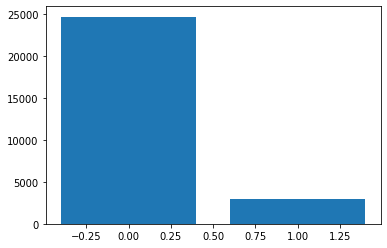

27720 27720


In [19]:
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

print(len(X_train), len(y_train))

In [20]:
undersampling_list =[]

for i in range(10):
    
    rus = RandomUnderSampler(random_state=42)
    X_trainr, y_trainr = rus.fit_resample(X_train, y_train)
    baseline_model = build_model()
    batch_size=32
    epochs=2
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_trainr, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
    history_baseline = baseline_model.fit(X_trainr, y_train_oh, batch_size=batch_size, 
                        epochs=epochs, validation_data=(X_test, test_y))
    score_baseline = baseline_model.evaluate(X_test, test_y, verbose=0)
    print('baseline test loss: ',score_baseline[0])
    print('baseline test accuracy: ', score_baseline[1] )

    y_pred_baseline_oh = baseline_model.predict(X_test)
    y_pred_baseline = y_pred_baseline_oh.argmax(axis=-1)
    undersampling_list.append(classification_report(y_test, y_pred_baseline, output_dict=True))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________________________________________________

2021-11-02 10:47:53.674286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-02 10:47:53.690463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-11-02 10:47:53.692464: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-02 10:47:53.693737: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library

5024/6000 [========================>.....] - ETA: 0s - loss: 0.8147 - acc: 0.6334

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 126us/sample - loss: 0.7945 - acc: 0.6417 - val_loss: 0.4843 - val_acc: 0.7965
Epoch 2/2
6000/6000 [==============================] - 1s 90us/sample - loss: 0.6131 - acc: 0.7093 - val_loss: 0.5178 - val_acc: 0.7437
baseline test loss:  0.5177778714368432
baseline test accuracy:  0.74368894
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                416       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_____________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 121us/sample - loss: 0.8529 - acc: 0.6303 - val_loss: 0.4587 - val_acc: 0.7952
Epoch 2/2
6000/6000 [==============================] - 1s 96us/sample - loss: 0.6162 - acc: 0.7097 - val_loss: 0.4901 - val_acc: 0.7511
baseline test loss:  0.49014601111595096
baseline test accuracy:  0.7511209
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                416       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_____________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 130us/sample - loss: 0.7467 - acc: 0.6688 - val_loss: 0.6271 - val_acc: 0.6316
Epoch 2/2
6000/6000 [==============================] - 1s 93us/sample - loss: 0.5926 - acc: 0.7113 - val_loss: 0.4976 - val_acc: 0.7514
baseline test loss:  0.497645933730883
baseline test accuracy:  0.7513666
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                416       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_______________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 138us/sample - loss: 0.7840 - acc: 0.6480 - val_loss: 0.4909 - val_acc: 0.7552
Epoch 2/2
6000/6000 [==============================] - 1s 98us/sample - loss: 0.6031 - acc: 0.7160 - val_loss: 0.4002 - val_acc: 0.8178
baseline test loss:  0.4001628652074971
baseline test accuracy:  0.8178245
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
______________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 190us/sample - loss: 0.7380 - acc: 0.6443 - val_loss: 0.5251 - val_acc: 0.7716
Epoch 2/2
6000/6000 [==============================] - 1s 131us/sample - loss: 0.5751 - acc: 0.7247 - val_loss: 0.5104 - val_acc: 0.7447
baseline test loss:  0.5104184046577129
baseline test accuracy:  0.7446717
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32)                128       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_____________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 210us/sample - loss: 0.8028 - acc: 0.6332 - val_loss: 0.5367 - val_acc: 0.7201
Epoch 2/2
6000/6000 [==============================] - 1s 153us/sample - loss: 0.6252 - acc: 0.6943 - val_loss: 0.4842 - val_acc: 0.7557
baseline test loss:  0.48423133774842264
baseline test accuracy:  0.7557275
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32)                128       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
____________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 173us/sample - loss: 0.7979 - acc: 0.6582 - val_loss: 0.4587 - val_acc: 0.7996
Epoch 2/2
6000/6000 [==============================] - 1s 107us/sample - loss: 0.6075 - acc: 0.7100 - val_loss: 0.4432 - val_acc: 0.7870
baseline test loss:  0.44315883866890254
baseline test accuracy:  0.786991
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32)                128       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_15 (Batc (None, 64)                256       
_____________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 182us/sample - loss: 0.7984 - acc: 0.6490 - val_loss: 0.4542 - val_acc: 0.7855
Epoch 2/2
6000/6000 [==============================] - 1s 119us/sample - loss: 0.6109 - acc: 0.7040 - val_loss: 0.4246 - val_acc: 0.8026
baseline test loss:  0.4245577657459248
baseline test accuracy:  0.802592
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32)                128       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
______________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 195us/sample - loss: 0.8055 - acc: 0.6402 - val_loss: 0.4935 - val_acc: 0.7473
Epoch 2/2
6000/6000 [==============================] - 1s 94us/sample - loss: 0.6029 - acc: 0.7032 - val_loss: 0.4585 - val_acc: 0.7770
baseline test loss:  0.4584544913700381
baseline test accuracy:  0.7770407
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32)                128       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_19 (Batc (None, 64)                256       
______________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6000/6000 [==============================] - 1s 162us/sample - loss: 0.6882 - acc: 0.6572 - val_loss: 0.5326 - val_acc: 0.7064
Epoch 2/2
6000/6000 [==============================] - 1s 96us/sample - loss: 0.5664 - acc: 0.7247 - val_loss: 0.5548 - val_acc: 0.7106
baseline test loss:  0.5548374918980209
baseline test accuracy:  0.7106443


In [21]:
post_process_results(undersampling_list, 'results_csv/adult_undersampling.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.909694,0.769634,0.831506,12435.000000
1,0.510409,0.746490,0.599631,3846.000000
accuracy,0.764167,0.764167,0.764167,0.764167
macro avg,0.710052,0.758062,0.715568,16281.000000
weighted avg,0.815373,0.764167,0.776731,16281.000000


# Random OverSampling

In [22]:
oversampling_list =[]    

for i in range(10):
    ros = RandomOverSampler(random_state=42)
    X_trainr, y_trainr = ros.fit_resample(X_train, y_train)
    baseline_model = build_model()
    batch_size=32
    epochs=2
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_trainr, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
    history_baseline = baseline_model.fit(X_trainr, y_train_oh, batch_size=batch_size, 
                        epochs=epochs, validation_data=(X_test, test_y))
    score_baseline = baseline_model.evaluate(X_test, test_y, verbose=0)
    print('baseline test loss: ',score_baseline[0])
    print('baseline test accuracy: ', score_baseline[1] )

    y_pred_baseline_oh = baseline_model.predict(X_test)
    y_pred_baseline = y_pred_baseline_oh.argmax(axis=-1)
    oversampling_list.append(classification_report(y_test, y_pred_baseline, output_dict=True))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32)                128       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_21 (Batc (None, 64)                256       
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)               

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 57us/sample - loss: 0.5618 - acc: 0.7329 - val_loss: 0.4261 - val_acc: 0.7940
Epoch 2/2
49440/49440 [==============================] - 2s 49us/sample - loss: 0.4563 - acc: 0.7854 - val_loss: 0.4835 - val_acc: 0.7460
baseline test loss:  0.4834725676916366
baseline test accuracy:  0.746023
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32)                128       
_________________________________________________________________
dense_34 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_23 (Batc (None, 64)                256       
___________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 57us/sample - loss: 0.5767 - acc: 0.7269 - val_loss: 0.4269 - val_acc: 0.7823
Epoch 2/2
49440/49440 [==============================] - 2s 49us/sample - loss: 0.4528 - acc: 0.7833 - val_loss: 0.4725 - val_acc: 0.7552
baseline test loss:  0.4725060499268722
baseline test accuracy:  0.75523615
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_24 (Batc (None, 32)                128       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_25 (Batc (None, 64)                256       
_________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 60us/sample - loss: 0.5333 - acc: 0.7430 - val_loss: 0.4585 - val_acc: 0.7625
Epoch 2/2
49440/49440 [==============================] - 2s 49us/sample - loss: 0.4524 - acc: 0.7875 - val_loss: 0.5771 - val_acc: 0.7143
baseline test loss:  0.5771133796229028
baseline test accuracy:  0.7143296
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_26 (Batc (None, 32)                128       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_27 (Batc (None, 64)                256       
__________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 62us/sample - loss: 0.5641 - acc: 0.7324 - val_loss: 0.4391 - val_acc: 0.7703
Epoch 2/2
49440/49440 [==============================] - 2s 50us/sample - loss: 0.4513 - acc: 0.7843 - val_loss: 0.4265 - val_acc: 0.7724
baseline test loss:  0.426490010796978
baseline test accuracy:  0.7724341
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32)                128       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_29 (Batc (None, 64)                256       
___________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 64us/sample - loss: 0.5421 - acc: 0.7445 - val_loss: 0.5575 - val_acc: 0.7104
Epoch 2/2
49440/49440 [==============================] - 3s 56us/sample - loss: 0.4487 - acc: 0.7905 - val_loss: 0.5753 - val_acc: 0.7076
baseline test loss:  0.5752972358458239
baseline test accuracy:  0.7076347
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_30 (Batc (None, 32)                128       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_31 (Batc (None, 64)                256       
__________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 65us/sample - loss: 0.5795 - acc: 0.7272 - val_loss: 0.4109 - val_acc: 0.8171
Epoch 2/2
49440/49440 [==============================] - 3s 54us/sample - loss: 0.4520 - acc: 0.7868 - val_loss: 0.3773 - val_acc: 0.8133
baseline test loss:  0.3772837256163946
baseline test accuracy:  0.8132793
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_32 (Batc (None, 32)                128       
_________________________________________________________________
dense_49 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_33 (Batc (None, 64)                256       
__________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 67us/sample - loss: 0.5293 - acc: 0.7443 - val_loss: 0.4249 - val_acc: 0.7834
Epoch 2/2
49440/49440 [==============================] - 3s 54us/sample - loss: 0.4479 - acc: 0.7885 - val_loss: 0.4550 - val_acc: 0.7589
baseline test loss:  0.4550264931400185
baseline test accuracy:  0.75886
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_34 (Batc (None, 32)                128       
_________________________________________________________________
dense_52 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_35 (Batc (None, 64)                256       
____________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 3s 69us/sample - loss: 0.5452 - acc: 0.7373 - val_loss: 0.3886 - val_acc: 0.8154
Epoch 2/2
49440/49440 [==============================] - 3s 56us/sample - loss: 0.4537 - acc: 0.7851 - val_loss: 0.4369 - val_acc: 0.7738
baseline test loss:  0.43691843936633845
baseline test accuracy:  0.7738468
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_36 (Batc (None, 32)                128       
_________________________________________________________________
dense_55 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_37 (Batc (None, 64)                256       
_________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 4s 71us/sample - loss: 0.5389 - acc: 0.7386 - val_loss: 0.4465 - val_acc: 0.7694
Epoch 2/2
49440/49440 [==============================] - 3s 57us/sample - loss: 0.4493 - acc: 0.7884 - val_loss: 0.4113 - val_acc: 0.7920
baseline test loss:  0.4112582399550633
baseline test accuracy:  0.7919661
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_38 (Batc (None, 32)                128       
_________________________________________________________________
dense_58 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_39 (Batc (None, 64)                256       
__________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


49440/49440 [==============================] - 4s 84us/sample - loss: 0.5569 - acc: 0.7375 - val_loss: 0.3974 - val_acc: 0.8076
Epoch 2/2
49440/49440 [==============================] - 3s 71us/sample - loss: 0.4539 - acc: 0.7886 - val_loss: 0.3899 - val_acc: 0.8108
baseline test loss:  0.38993672881860947
baseline test accuracy:  0.8108224


In [23]:
post_process_results(oversampling_list, 'results_csv/adult_oversampling.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.944480,0.736108,0.825389,12435.000000
1,0.507311,0.856058,0.633681,3846.000000
accuracy,0.764443,0.764443,0.764443,0.764443
macro avg,0.725895,0.796083,0.729535,16281.000000
weighted avg,0.841209,0.764443,0.780103,16281.000000


# Baseline Experiment

In [24]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

baseline_list =[]
for i in range(10):

    baseline_model = build_model()
    batch_size=32
    epochs=2
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_train, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
    history_baseline = baseline_model.fit(X_train, y_train_oh, batch_size=batch_size, 
                        epochs=epochs, validation_data=(X_test, test_y))
    score_baseline = baseline_model.evaluate(X_test, test_y, verbose=0)
    print('baseline test loss: ',score_baseline[0])
    print('baseline test accuracy: ', score_baseline[1] )

    y_pred_baseline_oh = baseline_model.predict(X_test)
    y_pred_baseline = y_pred_baseline_oh.argmax(axis=-1)
    baseline_list.append(classification_report(y_test, y_pred_baseline, output_dict=True))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_40 (Batc (None, 32)                128       
_________________________________________________________________
dense_61 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_41 (Batc (None, 64)                256       
_________________________________________________________________
flatten_20 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 2)               

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 3s 107us/sample - loss: 0.4137 - acc: 0.8427 - val_loss: 0.4949 - val_acc: 0.7847
Epoch 2/2
27720/27720 [==============================] - 2s 82us/sample - loss: 0.2746 - acc: 0.8976 - val_loss: 0.3849 - val_acc: 0.8267
baseline test loss:  0.38493872754009006
baseline test accuracy:  0.82673055
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32)                128       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_43 (Batc (None, 64)                256       
_______________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 3s 106us/sample - loss: 0.3825 - acc: 0.8449 - val_loss: 0.4544 - val_acc: 0.8020
Epoch 2/2
27720/27720 [==============================] - 2s 82us/sample - loss: 0.2730 - acc: 0.8982 - val_loss: 0.5022 - val_acc: 0.7890
baseline test loss:  0.5021991286481469
baseline test accuracy:  0.78901786
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_44 (Batc (None, 32)                128       
_________________________________________________________________
dense_67 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_45 (Batc (None, 64)                256       
________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 3s 110us/sample - loss: 0.4163 - acc: 0.8371 - val_loss: 0.4668 - val_acc: 0.7955
Epoch 2/2
27720/27720 [==============================] - 2s 85us/sample - loss: 0.2748 - acc: 0.8976 - val_loss: 0.4846 - val_acc: 0.7951
baseline test loss:  0.4846382913958286
baseline test accuracy:  0.7950986
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_46 (Batc (None, 32)                128       
_________________________________________________________________
dense_70 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_47 (Batc (None, 64)                256       
_________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 3s 114us/sample - loss: 0.3974 - acc: 0.8392 - val_loss: 0.4935 - val_acc: 0.7904
Epoch 2/2
27720/27720 [==============================] - 2s 86us/sample - loss: 0.2669 - acc: 0.9018 - val_loss: 0.4464 - val_acc: 0.7992
baseline test loss:  0.4463504649161941
baseline test accuracy:  0.7991524
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_48 (Batc (None, 32)                128       
_________________________________________________________________
dense_73 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_49 (Batc (None, 64)                256       
_________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 3s 115us/sample - loss: 0.3939 - acc: 0.8513 - val_loss: 0.5525 - val_acc: 0.7847
Epoch 2/2
27720/27720 [==============================] - 2s 87us/sample - loss: 0.2725 - acc: 0.8999 - val_loss: 0.4328 - val_acc: 0.7988
baseline test loss:  0.43284258607761933
baseline test accuracy:  0.79878384
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_50 (Batc (None, 32)                128       
_________________________________________________________________
dense_76 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_51 (Batc (None, 64)                256       
_______________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 3s 118us/sample - loss: 0.3993 - acc: 0.8439 - val_loss: 0.4822 - val_acc: 0.7929
Epoch 2/2
27720/27720 [==============================] - 2s 89us/sample - loss: 0.2764 - acc: 0.8988 - val_loss: 0.4287 - val_acc: 0.7996
baseline test loss:  0.42871228439528486
baseline test accuracy:  0.79958236
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_52 (Batc (None, 32)                128       
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_53 (Batc (None, 64)                256       
_______________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 3s 121us/sample - loss: 0.4116 - acc: 0.8436 - val_loss: 0.4983 - val_acc: 0.7885
Epoch 2/2
27720/27720 [==============================] - 3s 91us/sample - loss: 0.2742 - acc: 0.8999 - val_loss: 0.4491 - val_acc: 0.7988
baseline test loss:  0.44905791483971874
baseline test accuracy:  0.79878384
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_54 (Batc (None, 32)                128       
_________________________________________________________________
dense_82 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_55 (Batc (None, 64)                256       
_______________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 4s 129us/sample - loss: 0.3996 - acc: 0.8479 - val_loss: 0.5961 - val_acc: 0.7778
Epoch 2/2
27720/27720 [==============================] - 3s 93us/sample - loss: 0.2741 - acc: 0.8980 - val_loss: 0.4533 - val_acc: 0.7981
baseline test loss:  0.4532648483908489
baseline test accuracy:  0.7981082
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_56 (Batc (None, 32)                128       
_________________________________________________________________
dense_85 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_57 (Batc (None, 64)                256       
_________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 4s 131us/sample - loss: 0.4009 - acc: 0.8443 - val_loss: 0.5289 - val_acc: 0.7869
Epoch 2/2
27720/27720 [==============================] - 3s 95us/sample - loss: 0.2713 - acc: 0.8997 - val_loss: 0.4197 - val_acc: 0.8075
baseline test loss:  0.4197259356254193
baseline test accuracy:  0.80750567
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_58 (Batc (None, 32)                128       
_________________________________________________________________
dense_88 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_59 (Batc (None, 64)                256       
________________________________________

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27720/27720 [==============================] - 4s 131us/sample - loss: 0.3911 - acc: 0.8448 - val_loss: 0.4122 - val_acc: 0.8144
Epoch 2/2
27720/27720 [==============================] - 3s 96us/sample - loss: 0.2664 - acc: 0.9001 - val_loss: 0.4216 - val_acc: 0.8060
baseline test loss:  0.4215849676627022
baseline test accuracy:  0.80597013


In [25]:
post_process_results(baseline_list, 'results_csv/adult_baseline_cnn.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.797214,0.993719,0.884594,12435.000000
1,0.914476,0.181591,0.297396,3846.000000
accuracy,0.801873,0.801873,0.801873,0.801873
macro avg,0.855845,0.587655,0.590995,16281.000000
weighted avg,0.824915,0.801873,0.745883,16281.000000


# Augmentation Experiment

In [26]:
solver = tf.compat.v1.train.AdamOptimizer().minimize(vae_loss)
sess = tf.compat.v1.Session ()
sess.run(
tf.compat.v1.global_variables_initializer())

i = 0

for it in tqdm(range(50000)):
    ind = np.random.choice(X_train.shape[0], mb_size)
    X_mb = np.array(X_train[ind])
    y_mb = np.array(y_train_oh[ind])

    _, loss = sess.run([solver, vae_loss], feed_dict={X: X_mb, c: y_mb})

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:40<00:00, 1238.55it/s]


In [27]:
augment_list =[]
for i in range(10):
    y_train_oh = np.array(tf.keras.utils.to_categorical(y_train, num_classes=y_dim, dtype='float32'))
    test_y = np.array(tf.keras.utils.to_categorical(y_test, num_classes=y_dim, dtype='float32'))
        
    gen_samples, gen_labels = generate_sample()
    x = np.concatenate([X_train, gen_samples])
    y = np.concatenate([y_train, gen_labels])
    x = np.array(x)
    y_oh = np.array(tf.keras.utils.to_categorical(y, num_classes=y_dim, dtype='float32'))
    
    aug_model = build_model()
    batch_size=32
    epochs=2
    hist = aug_model.fit(x, y_oh, batch_size=batch_size, epochs=epochs, 
                            validation_data=(X_test, test_y))
    y_pred_aug_oh = aug_model.predict(X_test)
    y_pred_aug = y_pred_aug_oh.argmax(axis=-1)
    augment_list.append(classification_report(y_test, y_pred_aug, output_dict=True) )

(6400, 12)
(6400,)
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_60 (Batc (None, 32)                128       
_________________________________________________________________
dense_91 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_61 (Batc (None, 64)                256       
_________________________________________________________________
flatten_30 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_92 (Dense)             (None

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 4s 125us/sample - loss: 0.2834 - acc: 0.8986 - val_loss: 0.4011 - val_acc: 0.8243
Epoch 2/2
34120/34120 [==============================] - 3s 96us/sample - loss: 0.2199 - acc: 0.9203 - val_loss: 0.4660 - val_acc: 0.8019
(6400, 12)
(6400,)
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_62 (Batc (None, 32)                128       
_________________________________________________________________
dense_94 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_63 (Batc (None, 64)                256       
_________________________________________________________________
flatten_31 (Flatten)         (N

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 4s 127us/sample - loss: 0.3002 - acc: 0.8947 - val_loss: 0.4935 - val_acc: 0.7931
Epoch 2/2
34120/34120 [==============================] - 3s 98us/sample - loss: 0.2270 - acc: 0.9166 - val_loss: 0.4391 - val_acc: 0.8075
(6400, 12)
(6400,)
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_64 (Batc (None, 32)                128       
_________________________________________________________________
dense_97 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_65 (Batc (None, 64)                256       
_________________________________________________________________
flatten_32 (Flatten)         (N

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 132us/sample - loss: 0.2925 - acc: 0.8962 - val_loss: 0.4275 - val_acc: 0.8100
Epoch 2/2
34120/34120 [==============================] - 3s 100us/sample - loss: 0.2212 - acc: 0.9199 - val_loss: 0.4908 - val_acc: 0.7969
(6400, 12)
(6400,)
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 32)                416       
_________________________________________________________________
batch_normalization_66 (Batc (None, 32)                128       
_________________________________________________________________
dense_100 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_67 (Batc (None, 64)                256       
_________________________________________________________________
flatten_33 (Flatten)         (

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 133us/sample - loss: 0.2888 - acc: 0.8979 - val_loss: 0.4299 - val_acc: 0.8195
Epoch 2/2
34120/34120 [==============================] - 3s 100us/sample - loss: 0.2235 - acc: 0.9189 - val_loss: 0.3984 - val_acc: 0.8279
(6400, 12)
(6400,)
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 32)                416       
_________________________________________________________________
batch_normalization_68 (Batc (None, 32)                128       
_________________________________________________________________
dense_103 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_69 (Batc (None, 64)                256       
_________________________________________________________________
flatten_34 (Flatten)         (

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 136us/sample - loss: 0.2918 - acc: 0.8963 - val_loss: 0.4924 - val_acc: 0.7981
Epoch 2/2
34120/34120 [==============================] - 4s 104us/sample - loss: 0.2240 - acc: 0.9184 - val_loss: 0.4538 - val_acc: 0.8058
(6400, 12)
(6400,)
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 32)                416       
_________________________________________________________________
batch_normalization_70 (Batc (None, 32)                128       
_________________________________________________________________
dense_106 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_71 (Batc (None, 64)                256       
_________________________________________________________________
flatten_35 (Flatten)         (

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 138us/sample - loss: 0.3047 - acc: 0.8925 - val_loss: 0.4643 - val_acc: 0.7924
Epoch 2/2
34120/34120 [==============================] - 4s 104us/sample - loss: 0.2229 - acc: 0.9174 - val_loss: 0.4188 - val_acc: 0.8119
(6400, 12)
(6400,)
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 32)                416       
_________________________________________________________________
batch_normalization_72 (Batc (None, 32)                128       
_________________________________________________________________
dense_109 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_73 (Batc (None, 64)                256       
_________________________________________________________________
flatten_36 (Flatten)         (

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 152us/sample - loss: 0.2962 - acc: 0.8941 - val_loss: 0.5064 - val_acc: 0.7996
Epoch 2/2
34120/34120 [==============================] - 4s 106us/sample - loss: 0.2257 - acc: 0.9164 - val_loss: 0.4458 - val_acc: 0.8061
(6400, 12)
(6400,)
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 32)                416       
_________________________________________________________________
batch_normalization_74 (Batc (None, 32)                128       
_________________________________________________________________
dense_112 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_75 (Batc (None, 64)                256       
_________________________________________________________________
flatten_37 (Flatten)         (

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 145us/sample - loss: 0.2918 - acc: 0.8936 - val_loss: 0.5106 - val_acc: 0.7910
Epoch 2/2
34120/34120 [==============================] - 4s 108us/sample - loss: 0.2251 - acc: 0.9173 - val_loss: 0.4071 - val_acc: 0.8095
(6400, 12)
(6400,)
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 32)                416       
_________________________________________________________________
batch_normalization_76 (Batc (None, 32)                128       
_________________________________________________________________
dense_115 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_77 (Batc (None, 64)                256       
_________________________________________________________________
flatten_38 (Flatten)         (

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 146us/sample - loss: 0.3038 - acc: 0.8911 - val_loss: 0.5139 - val_acc: 0.7852
Epoch 2/2
34120/34120 [==============================] - 4s 109us/sample - loss: 0.2257 - acc: 0.9183 - val_loss: 0.4420 - val_acc: 0.8093
(6400, 12)
(6400,)
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 32)                416       
_________________________________________________________________
batch_normalization_78 (Batc (None, 32)                128       
_________________________________________________________________
dense_118 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_79 (Batc (None, 64)                256       
_________________________________________________________________
flatten_39 (Flatten)         (

/media/adamu/data/projects/notebooks/UCI_encoders/imbalance_venv/lib/python3.8/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34120/34120 [==============================] - 5s 149us/sample - loss: 0.2987 - acc: 0.8958 - val_loss: 0.4694 - val_acc: 0.7955
Epoch 2/2
34120/34120 [==============================] - 4s 113us/sample - loss: 0.2278 - acc: 0.9174 - val_loss: 0.4484 - val_acc: 0.8050


In [28]:
post_process_results(augment_list, 'results_csv/adult_VAE.csv')

number of runs: 10


,precision,recall,f1-score,support
0,0.803517,0.991548,0.887624,12435.000000
1,0.894926,0.215315,0.343613,3846.000000
accuracy,0.808181,0.808181,0.808181,0.808181
macro avg,0.849222,0.603431,0.615619,16281.000000
weighted avg,0.825110,0.808181,0.759114,16281.000000
